<a href="https://colab.research.google.com/github/hbaflast/deep-learning-tutorial-fr/blob/main/r%C3%A9gression_lin%C3%A9aire_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Régression linéaire simple**

Dans cet exercice vous allez apprendre à construire une régression linéaire simple en pure python sans librairies.

Et l'apprentissage par descente de gradient afin de compendre comment cela se passe dans les réseaux de neuronnes.


**Importation du jeu de données**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

**Afficher le jeu de données**

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Simple régression

L'équation d'une régression linéaire simple c'est à dire à une seule variable est la suivante :

$y= wx + b$

**Faire une fonction qui calcule y**

In [ ]:
def predict(x, w, b):
  return w*x + b

On va ensuite coder notre fonction de coût afin de pouvoir optimiser nos paramètres.

Dans le cas d'une régression linéaire on utilise l'erreur quadratique moyenne (Mean squared error) qui a pour équation :

$MSE =\frac{1}N\sum_{i=1}^n (y_i - (w*x_i + b))^2$

**Faire une fonction qui calcule la fonction de coût**

In [ ]:
def cost_function(y, x, w, b):
    N = len(y)
    total_error = 0
    for i in range(N):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / N

Afin d'optimiser notre fonction de coût, on va utiliser la descente de gradient.

On va calculer les dérivés partielles par rapport à nos paramètres et mettre à jours ces paramètres en suivant la formule :

$w \leftarrow w -  \alpha * \frac {\partial L(x,y)}{\partial w}$

On met à jours les paramètres dans le sens opposé à la direction du gradient afin de minimiser notre fonction de coût.

On controle la taille de la mise à jour avec un pas $\alpha$.


**Faire une fonction qui permet de mettre à jour les paramètres en utilisant la méthode de la descente de gradient**

In [ ]:
def update_weights(y, x, w, b, lr):
    w_deriv = 0
    b_deriv = 0
    N = len(y)

    for i in range(N):
        # Calcul des dérivées partielles
        # -2x(y - (mx + b))
        w_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(y[i] - (w*x[i] + b))

    # On update les paramètres dans le sens inverse du gradient
    w -= (w_deriv / N) * lr
    b -= (b_deriv / N) * lr

    return w, b

On va maintenant entrainer notre modèle en itérant plusieurs fois sur notre jeu de données et en effectuant une mise à jours des paramètres à chaque fois avec la méthode de la descente de gradient

**Faire une fonction permetant d'entrainer notre modèle**

On sauvegarder l'évolution de la fonction de coût.

On va aussi afficher toute les 10 itérations la valeur de la fonction de coût, les valeurs des paramètres et un graphique de nos données et de la droite de l'équation de notre régression.

In [ ]:
def train(y, x, w, b, lr, iters):
    cost_history = []

    for i in range(iters):
        w, b = update_weights(y, x, w, b, lr)

        # Calcul de la fonction de coût pour observer la progression
        cost = cost_function(y, x, w, b)
        cost_history.append(cost)

        # Affichage de la progression
        if i % 10 == 0:
            print("iter: "+str(i) + " cost: "+str(cost) + " w: "+str(w) + " b: "+str(b))
            plt.plot(x, y, 'bo')
            plt.plot(np.arange(max(x)), w*np.arange(max(x)) + b)
            plt.xlabel('radio')
            plt.ylabel('sales')
            plt.title('Regression lineaire', fontsize=16)
            plt.show()

    return cost_history

On va prédire ici le nombre de ventes en fonction des dépenses de pubs à la radio

**Assigner les variables x et y en fonction de notre objectif**

In [ ]:
y = dataset['Sales'].tolist()
x = dataset['Radio'].tolist()

**Afficher le graphique de y en fonction de x**

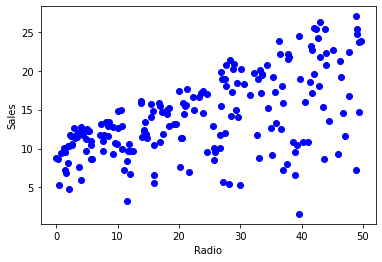

In [ ]:
plt.plot(x, y, 'bo')
plt.xlabel('Radio')
plt.ylabel('Sales');

**Effectuer l'entrainement du modèle**

iter: 0 cost: 172.87901309735145 w: 0.07412639000000001 b: 0.0028045000000000006


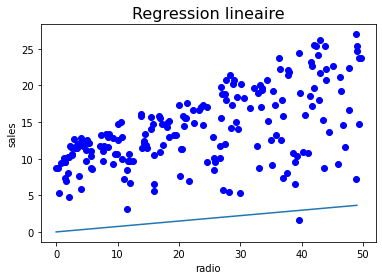

iter: 10 cost: 47.75904814888352 w: 0.4076486759689914 b: 0.018370739339365703


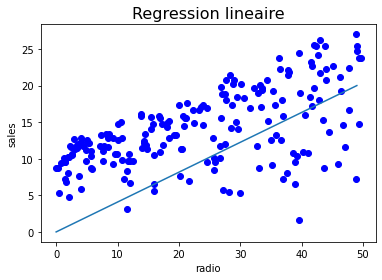

iter: 20 cost: 43.13225378107925 w: 0.47146058340371977 b: 0.025680641880419925


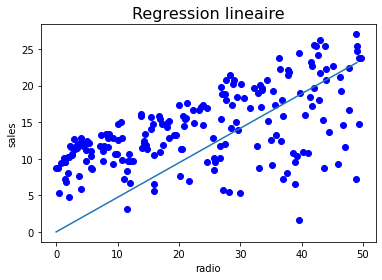

iter: 30 cost: 42.93459612861044 w: 0.48356258041425776 b: 0.031405113663927973


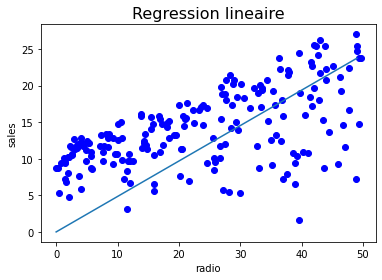

iter: 40 cost: 42.89977707947926 w: 0.4857506162346239 b: 0.03682312975754128


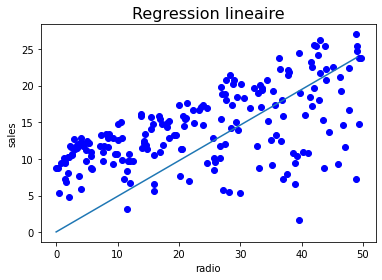

In [ ]:
cost_history = train(y, x, 0, 0, 0.0001, 50)

**Afficher l'évolution de la fonction de coût**

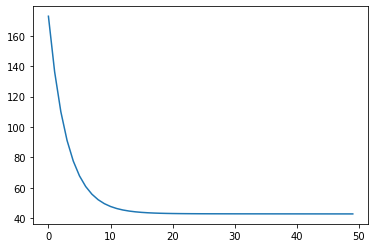

In [ ]:
plt.plot(cost_history);